In [1]:
import pandas as pd
data = pd.read_csv("/Users/sonal/Desktop/uni_dataset.csv")

In [2]:
data

,uid,credits,codebases,phoenix_contributor
0,1,0,34,True
1,2,305,108,True
2,3,247,75,False
3,4,287,84,True
4,5,441,77,True
...,...,...,...,...
595,596,475,57,False
596,597,23,21,True
597,598,45,5,True
598,599,2,48,False


In [3]:
len(data)

600

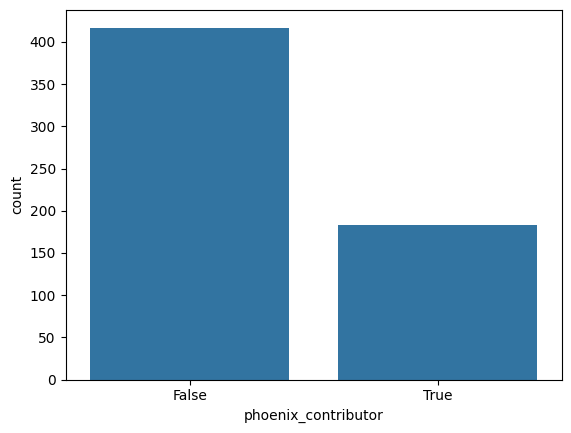

In [4]:
import seaborn as sns
sns.countplot(x="phoenix_contributor", data=data);


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   uid                  600 non-null    int64
 1   credits              600 non-null    int64
 2   codebases            600 non-null    int64
 3   phoenix_contributor  600 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 14.8 KB


In [6]:
data.describe()

,uid,credits,codebases
count,600.000000,600.000000,600.000000
mean,300.500000,309.003333,109.430000
std,173.349358,174.737284,783.118552
min,1.000000,0.000000,0.000000
25%,150.750000,163.750000,38.000000
50%,300.500000,304.500000,76.000000
75%,450.250000,465.000000,114.250000
max,600.000000,600.000000,19200.000000


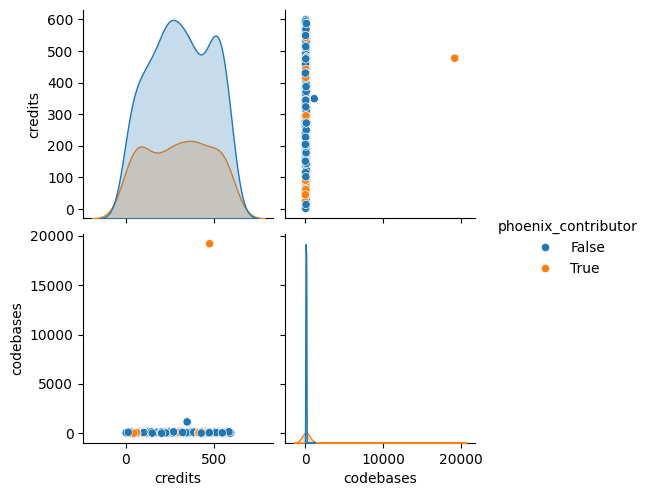

In [7]:
sns.pairplot(data, vars=("credits", "codebases"), hue="phoenix_contributor")

In [8]:
data["codebases"] = data.codebases.clip(upper=250) 
data["credits"] = data.credits.clip(upper=250)


In [9]:
data

,uid,credits,codebases,phoenix_contributor
0,1,0,34,True
1,2,250,108,True
2,3,247,75,False
3,4,250,84,True
4,5,250,77,True
...,...,...,...,...
595,596,250,57,False
596,597,23,21,True
597,598,45,5,True
598,599,2,48,False


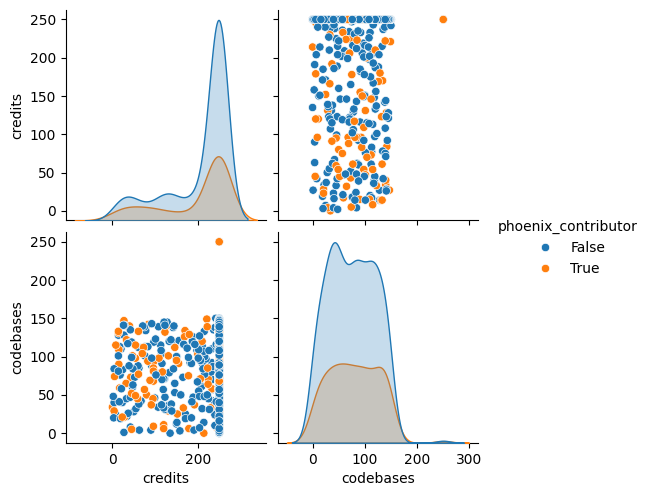

In [10]:
sns.pairplot(data, vars=("credits", "codebases"), hue="phoenix_contributor")

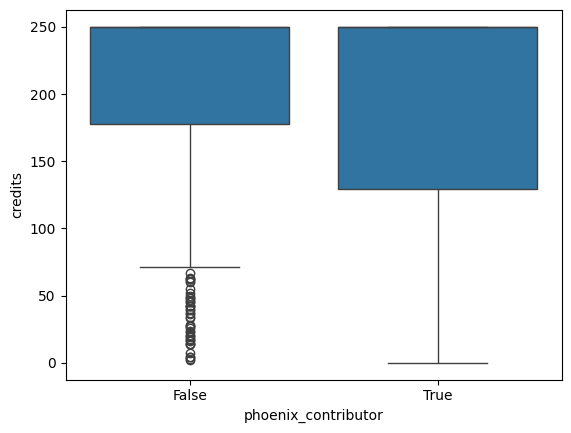

In [11]:
sns.boxplot(x="phoenix_contributor",y="credits",data=data);

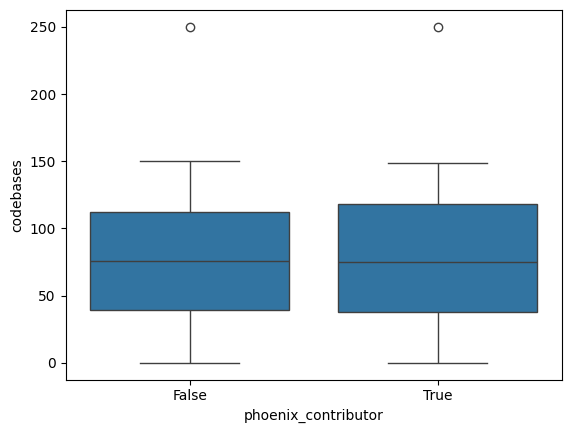

In [12]:
sns.boxplot(x="phoenix_contributor",y="codebases",data=data);

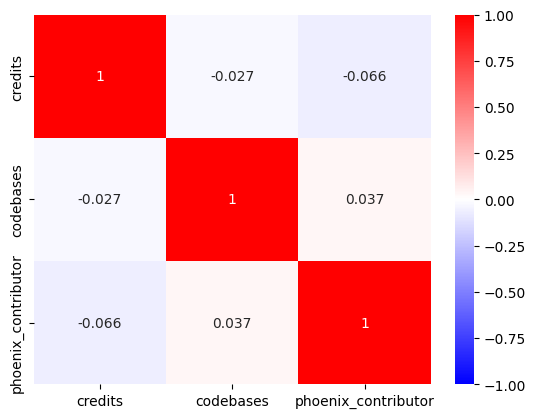

In [13]:
df = data.drop("uid", axis=1)
sns.heatmap(df.corr(), cmap="bwr", vmin=-1, vmax=1, annot=True);


In [15]:
features = ["credits", "codebases"]
y = data.phoenix_contributor
X = data[features]


In [17]:
y

0       True
1       True
2      False
3       True
4       True
       ...  
595    False
596     True
597     True
598    False
599    False
Name: phoenix_contributor, Length: 600, dtype: bool

In [19]:
X

,credits,codebases
0,0,34
1,250,108
2,247,75
3,250,84
4,250,77
...,...,...
595,250,57
596,23,21
597,45,5
598,2,48


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=123, 
                                                    stratify=y 
) 


In [21]:
X_train

,credits,codebases
273,250,36
455,246,6
130,250,17
101,250,55
67,250,112
...,...,...
111,236,57
275,250,120
199,240,138
133,250,1


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=251, min_samples_leaf=10)
clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=10, random_state=251)

In [23]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp.fit(X_train)


SimpleImputer()

In [24]:
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)


In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=251, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=251)

In [26]:
clf.predict(X)

/Users/sonal/Desktop/neobook/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
from sklearn.metrics import accuracy_score 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.5722222222222222

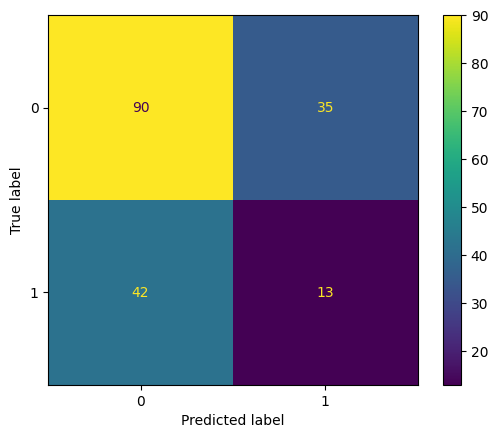

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  
matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.68      0.72      0.70       125
        True       0.27      0.24      0.25        55

    accuracy                           0.57       180
   macro avg       0.48      0.48      0.48       180
weighted avg       0.56      0.57      0.56       180



In [5]:
########################################
## Section on the Neo4j Python Driver ##
##
## Installation -> pip install neo4j
##
## Full documentation 
## https://neo4j.com/docs/api/python-driver/current/
########################################

In [7]:
from neo4j import GraphDatabase
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "12345678"))
driver

In [20]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN n") 


In [30]:
nodeProj = {
  "User": {
    "label": "User",
    "properties": []
  }
}
relProj = {
  "KNOWS": {
    "orientation": "KNOWS",
    "aggregation": "SINGLE"
  }
}
cypher = "CALL gds.graph.project($graphName, $nodeProj, $relProj)"
with driver.session() as session:
  result = session.run(
    cypher, graphName="feature_projection", nodeProj=nodeProj, relProj=relProj
  )
